# Exercises

In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("../../../../AchimBrinkop/Neuro-Analysis/01-local_field_potential/code"))
from utils import download_data
import lfp_functions as lf

from scipy.signal import butter
from scipy.signal import sosfilt

from scipy import signal
from pywt import Wavelet
from pywt import scale2frequency
from pywt import cwt
from ipywidgets import interact
import ipywidgets as widgets
from scipy.stats import zscore

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

### FPB comments 
you didn't add the code and data directories so I had to get them somewhere else 

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)


In [3]:
# importing data
with open('../../../../AchimBrinkop/Neuro-Analysis/01-local_field_potential/data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.

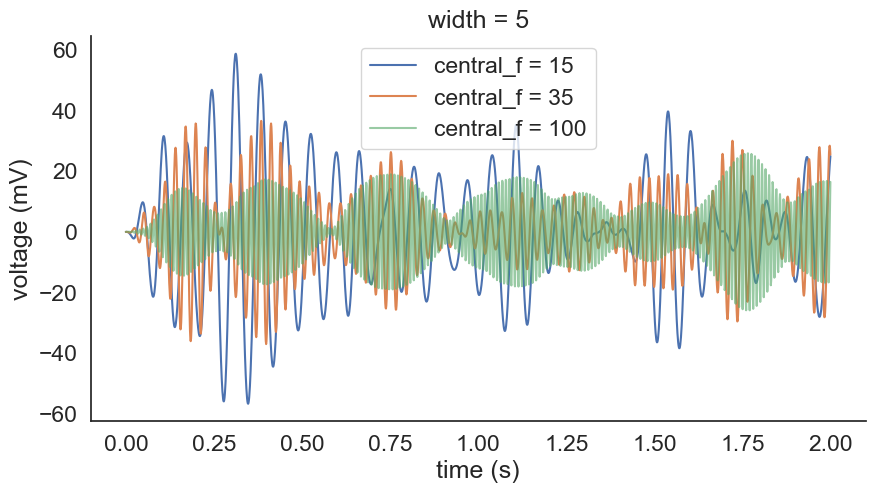

In [4]:
# Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting signal.
lfp_part = lfp[:2000]
filter_order = 3 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability

width = 5
    
central_f = 15
low_f = central_f - 0.5*width
high_f = central_f + 0.5*width
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
band_lfp_low = sosfilt(filter, lfp_part)

central_f = 35
low_f = central_f - 0.5*width
high_f = central_f + 0.5*width
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
band_lfp_mid = sosfilt(filter, lfp_part)

central_f = 100
low_f = central_f - 0.5*width
high_f = central_f + 0.5*width
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
band_lfp_high = sosfilt(filter, lfp_part)

plt.figure(figsize=(10,5))
plt.title('width = 5')
plt.plot(np.linspace(0,2,2000), band_lfp_low,label = 'central_f = 15')
plt.plot(np.linspace(0,2,2000), band_lfp_mid,label = 'central_f = 35')
plt.plot(np.linspace(0,2,2000), band_lfp_high,label = 'central_f = 100', alpha=0.6)
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.legend()
plt.show()

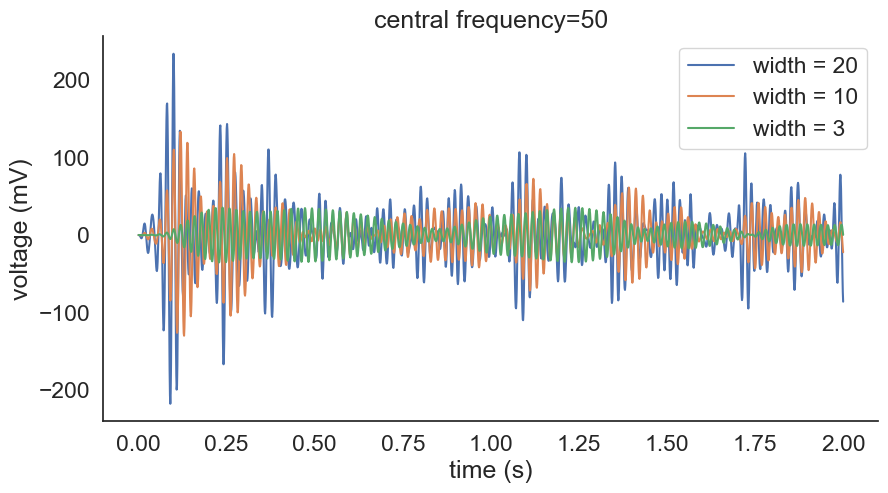

In [5]:
# Fix the central frequency and play with the width of the band
central_f = 50
width = 10
low_f = central_f - 0.5*width
high_f = central_f + 0.5*width
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
band10_lfp = sosfilt(filter, lfp_part)

width = 3
low_f = central_f - 0.5*width
high_f = central_f + 0.5*width
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
band3_lfp = sosfilt(filter, lfp_part)

width = 20
low_f = central_f - 0.5*width
high_f = central_f + 0.5*width
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
band20_lfp = sosfilt(filter, lfp_part)

plt.figure(figsize=(10,5))
plt.title('central frequency=50')
plt.plot(np.linspace(0,2,2000), band20_lfp,label = 'width = 20')
plt.plot(np.linspace(0,2,2000), band10_lfp,label = 'width = 10')
plt.plot(np.linspace(0,2,2000), band3_lfp,label = 'width = 3')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.legend()
plt.show()

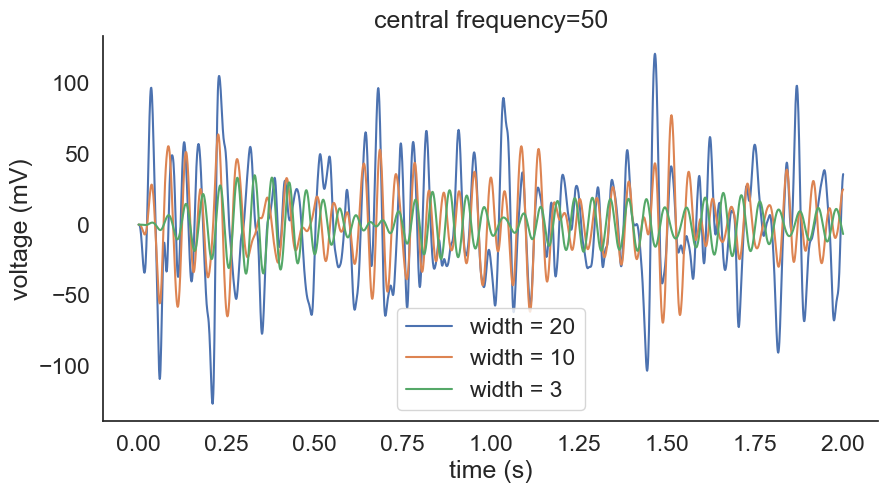

In [5]:
# try to change the central frequency of the band
central_f = 20
width = 10
low_f = central_f - 0.5*width
high_f = central_f + 0.5*width
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
band10_lfp = sosfilt(filter, lfp_part)

width = 3
low_f = central_f - 0.5*width
high_f = central_f + 0.5*width
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
band3_lfp = sosfilt(filter, lfp_part)

width = 20
low_f = central_f - 0.5*width
high_f = central_f + 0.5*width
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
band20_lfp = sosfilt(filter, lfp_part)

plt.figure(figsize=(10,5))
plt.title('central frequency=50')
plt.plot(np.linspace(0,2,2000), band20_lfp,label = 'width = 20')
plt.plot(np.linspace(0,2,2000), band10_lfp,label = 'width = 10')
plt.plot(np.linspace(0,2,2000), band3_lfp,label = 'width = 3')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.legend()
plt.show()

- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )

filter order 1
404 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
48.1 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
filter order 3
684 µs ± 26.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
48.3 µs ± 893 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
filter order 5
950 µs ± 20 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
55.3 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


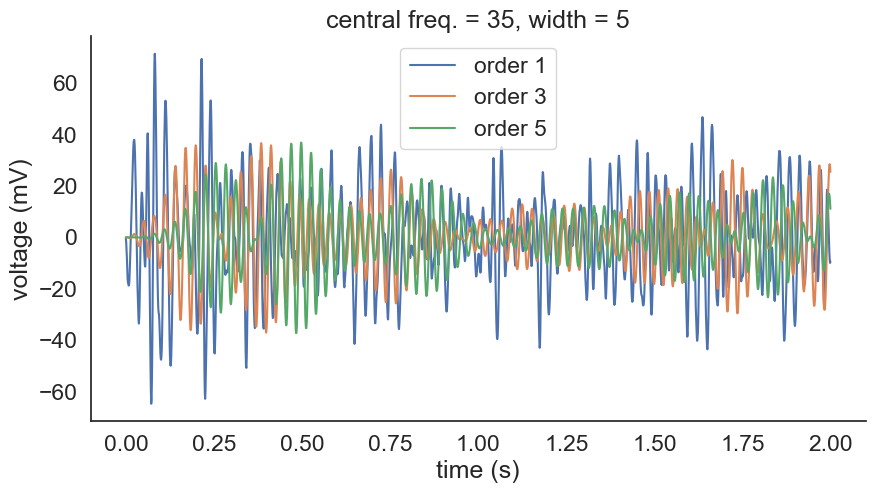

In [6]:
lfp_part = lfp[:2000]

width = 5   
central_f = 35
low_f = central_f - 0.5*width
high_f = central_f + 0.5*width

filter_order = 1
print("filter order 1")
%timeit butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
%timeit sosfilt(filter, lfp_part)
band_lfp_filt1 = sosfilt(filter, lfp_part)

filter_order = 3 
print("filter order 3")
%timeit butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
%timeit sosfilt(filter, lfp_part)
band_lfp_filt3 = sosfilt(filter, lfp_part)

filter_order = 5 
print("filter order 5")
%timeit butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
filter = butter(filter_order,[low_f,high_f],btype='band', output='sos', fs=sampling_rate)
%timeit sosfilt(filter, lfp_part)
band_lfp_filt5 = sosfilt(filter, lfp_part)

plt.figure(figsize=(10,5))
plt.title('central freq. = 35, width = 5')
plt.plot(np.linspace(0,2,2000), band_lfp_filt1,label = 'order 1')
plt.plot(np.linspace(0,2,2000), band_lfp_filt3,label = 'order 3')
plt.plot(np.linspace(0,2,2000), band_lfp_filt5,label = 'order 5')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.legend()
plt.show()

- Comment on what you see

Results %timeit:  
filter order 1  
974 µs ± 72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)  
105 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)  
filter order 3  
1.56 ms ± 9.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)  
110 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)  
filter order 5  
2.22 ms ± 58.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)  
129 µs ± 5.66 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)  

We expect the higher the order, the sharper the filter frequency response, but with more computations and potental numerical instability. We do indeed see that the order changes the signal quite a lot while the central frequency and width is the same. We indeed see that higher order have a sharper filter frequency response than lower order. In the timeit we also see the difference we expected. We expected higher order to have higher computational time and we do see that (see above).

### FPB comments 
rest of the code and comments are OK. On the last point, you see mostly two things when you change the order, first, the shift increases, because here we use `sosfilt` which is a causal filter, so there is a shift proportional to the length of the filter. `sosfiltfilt` compensates this, and we should include it in next years version of the course. Grade: 9

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`

Already done in Exercise 1

- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.

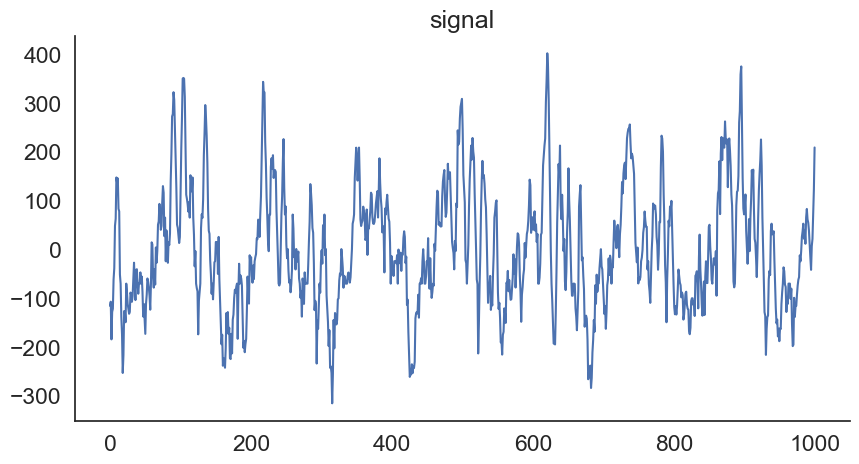

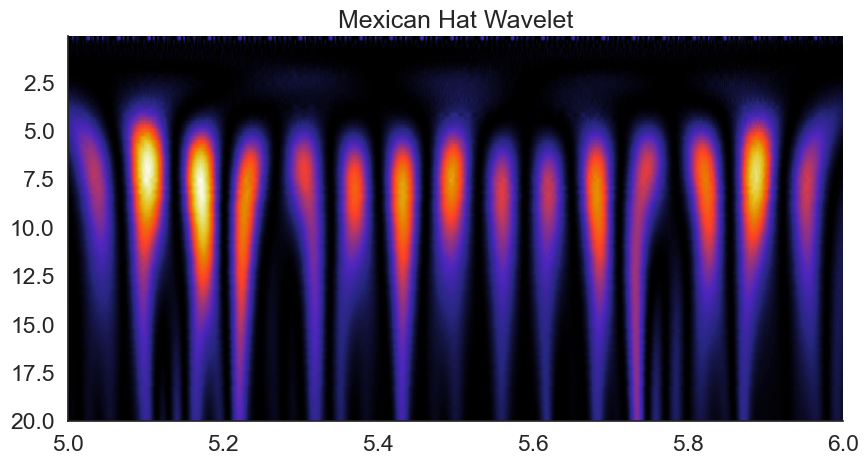

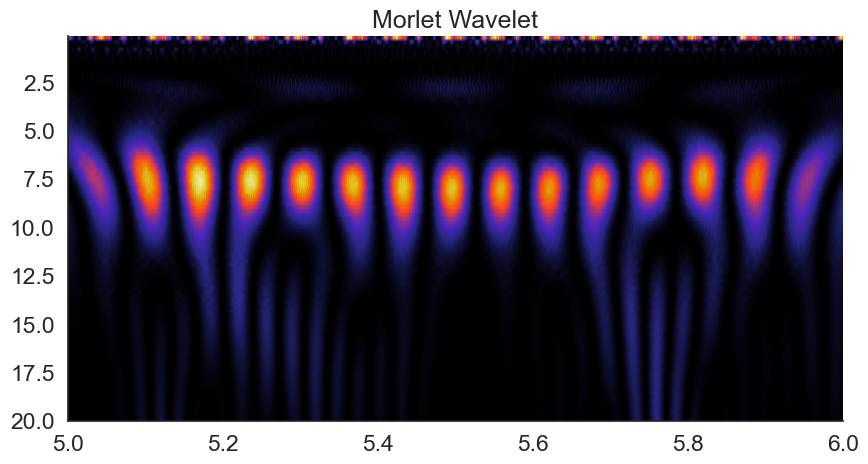

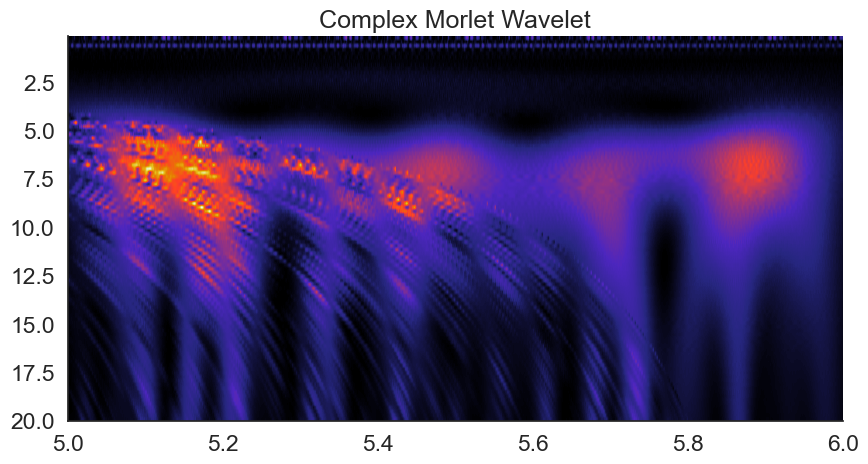

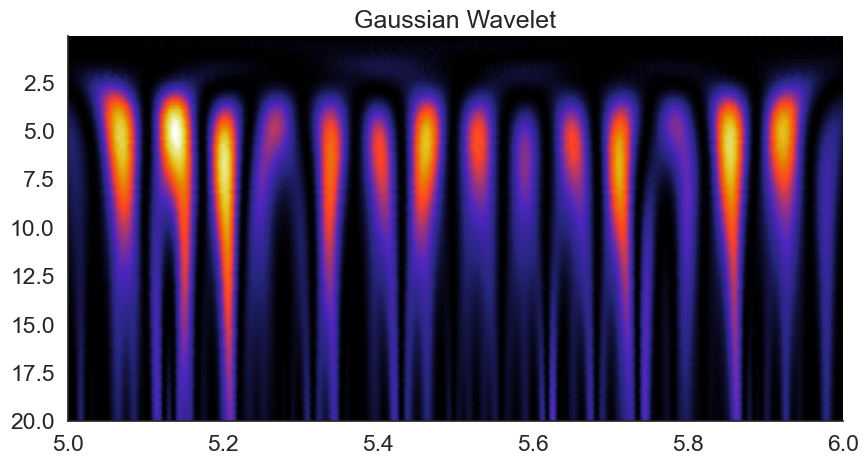

In [8]:
start = 5 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.title('signal')
plt.plot(sig)

#spectrogram with mexican hat transform
frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.title('Mexican Hat Wavelet')
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

#spectrogram with morlet transform
frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.title('Morlet Wavelet')
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

#spectrogram with morlet transform
frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'cmor'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.title('Complex Morlet Wavelet')
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

#spectrogram with gaussian transform
frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1' # this didn't work, it kept saying it doesn't know this, but it should
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.title('Gaussian Wavelet')
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

plt.show()

I kept getting this error:  
ValueError: Unknown wavelet name 'gaus', check wavelist() for the list of available builtin wavelets.

However when looking up wavelist() 'gaus' was in the list so I don't understand why it says it isn't.

In [8]:
from pywt import wavelist
?wavelist

Docstring:
wavelist(family=None, kind='all')

Returns list of available wavelet names for the given family name.

Parameters
----------
family : str, optional
    Short family name. If the family name is None (default) then names
    of all the built-in wavelets are returned. Otherwise the function
    returns names of wavelets that belong to the given family.
    Valid names are::

        'haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus',
        'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor'

kind : {'all', 'continuous', 'discrete'}, optional
    Whether to return only wavelet names of discrete or continuous
    wavelets, or all wavelets.  Default is ``'all'``.
    Ignored if ``family`` is specified.

Returns
-------
wavelist : list of str
    List of available wavelet names.

Examples
--------
>>> import pywt
>>> pywt.wavelist('coif')
['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', ...
>>> pywt.wavelist(kind='continuous')
['cgau1', 'cgau2', 'cgau3', 'cgau4

### FPB comments
wavelet is called "gaus1" (so the docs are wrong...) 

- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.  

Well, the complex morlet is very ugly so I am thinking I did something wrong. The other explanation could be that the signal simply isn't complex and that is why the spectrum is ugly.

### FPB comments 
you should specify the scale of the complex morlet wavelet, so use the string 'cmor1.0-1.0' or something like that. The other difference is that the complex one doesn'thave phase artifact (the stripes). Grade: 7

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`  

Already done in Exercise 1

In [9]:
lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']

- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.

In [9]:
start = 0
end = len(lfp)/sampling_rate
sig = lfp
sig = sig #- np.mean(sig) # get rid of 0 frequency component

frequencies =  np.linspace(6,10,50)/sampling_rate
wavelet = 'cmor1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)

power_theta = np.mean(abs(cwtmatr)**2,axis=0)

frequencies =  np.linspace(2,4,25)/sampling_rate
wavelet = 'cmor1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)

power_delta = np.mean(abs(cwtmatr)**2,axis=0)

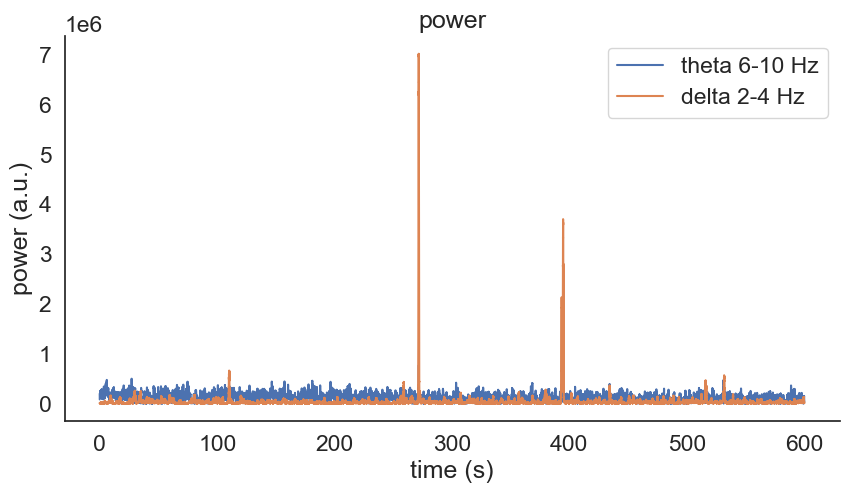

In [10]:
plt.figure(figsize=(10,5))
plt.title('power')
plt.plot(np.linspace(start,end,len(power_theta)),power_theta, label='theta 6-10 Hz')
plt.plot(np.linspace(start,end,len(power_delta)),power_delta, label='delta 2-4 Hz')
plt.xlabel('time (s)')
plt.legend()
#plt.xlim([0,10])
#plt.ylim([0,1e6])
plt.ylabel('power (a.u.)')
plt.show()

- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)

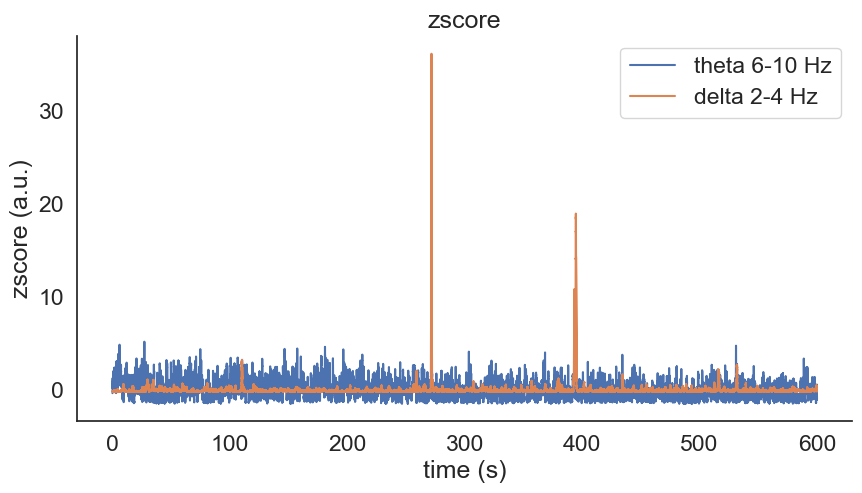

In [12]:
zscore_theta = zscore(power_theta)
zscore_delta = zscore(power_delta)

plt.figure(figsize=(10,5))
plt.title('zscore')
plt.plot(np.linspace(start,end,len(zscore_theta)),zscore_theta, label='theta 6-10 Hz')
plt.plot(np.linspace(start,end,len(zscore_delta)),zscore_delta, label='delta 2-4 Hz')
plt.xlabel('time (s)')
plt.legend()
#plt.xlim([0,10])
#plt.ylim([0,1e6])
plt.ylabel('zscore (a.u.)')
plt.show()

- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.

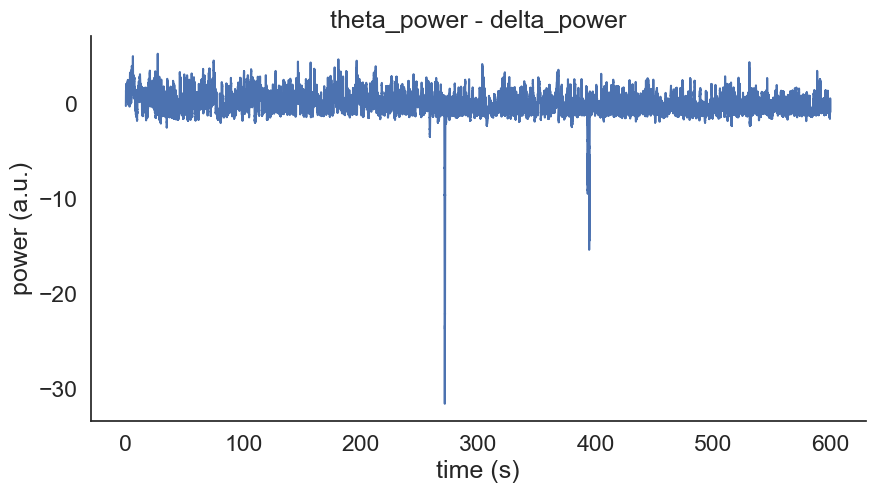

In [13]:
diff_power = zscore_theta - zscore_delta

plt.figure(figsize=(10,5))
plt.title('theta_power - delta_power')
plt.plot(np.linspace(start,end,len(diff_power)),diff_power)
#plt.xlim([0,10])
#plt.ylim([0,1])
plt.xlabel('time (s)')
plt.ylabel('power (a.u.)')
plt.show()

- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.

(0.0, 100.0)

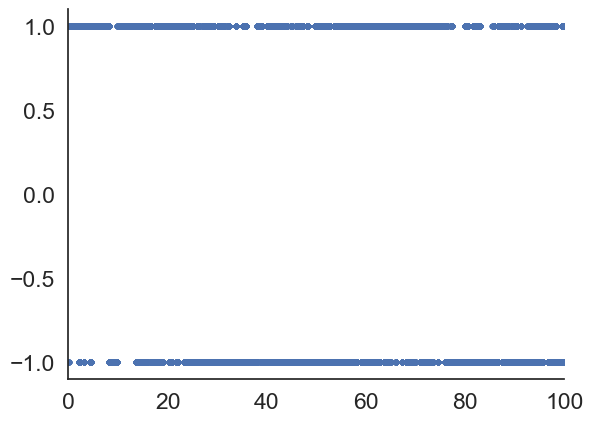

In [14]:
REM_Arr = np.array([1 if x >=0.2 else -1 for x in diff_power])
plt.plot(np.linspace(start,end,len(diff_power)), REM_Arr, '.')
plt.xlim([0,100])

- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).

- Explore how changing the threshold affects the amount of REM sleep detected.

I think I don't get the right result for when there is or isn't REM sleep so I can't really make these last two exercises.

### FPB comments 
you should have applied a smoothing on the statistics (we should have been clearer on this point as a matter of fact) because typically the REM/NREM epochs last for several seconds. Now you are mostly looking at fluctuations. Grade: 7.5